In [1]:
# Import necessary libraries and modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import kagglehub
import os
import kaggle
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


c:\Users\eddie\anaconda3\envs\data_analysis\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Download and update dataset
dataset = 'adrianjuliusaluoch/hourly-crypto-stocks-market-data'
csv_file = 'stocks.csv'

kaggle.api.authenticate()
kaggle.api.dataset_download_files(dataset, path='.', unzip=True)

Dataset URL: https://www.kaggle.com/datasets/adrianjuliusaluoch/hourly-crypto-stocks-market-data


In [3]:
# Read financial dataset and initial assessment
df = pd.read_csv("stocks.csv")
df = df.query("name != 'Citigroup'")
df.head()
df.info()
df.describe()
df.tail()
df['name'].nunique()

<class 'pandas.core.frame.DataFrame'>
Index: 174968 entries, 0 to 177037
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   timestamp  174968 non-null  object 
 1   name       174968 non-null  object 
 2   last       174968 non-null  float64
 3   high       174968 non-null  float64
 4   low        174968 non-null  float64
 5   chg_       174968 non-null  float64
 6   chg_%      174968 non-null  object 
 7   vol_       174968 non-null  object 
 8   time       174968 non-null  object 
dtypes: float64(4), object(5)
memory usage: 13.3+ MB


30

In [4]:
# Pre-clean dataset
df.head(10)

,timestamp,name,last,high,low,chg_,chg_%,vol_,time
0,2025-10-16 02:00:02,Cisco,69.56,70.30,68.82,0.90,+1.31%,14.14M,15:59:59
1,2025-10-16 02:00:02,Microsoft,513.74,517.19,510.00,0.17,+0.03%,10.8M,15:59:59
2,2025-10-16 02:00:02,Goldman Sachs,768.32,782.49,762.66,-2.44,-0.32%,3.08M,15:59:59
3,2025-10-16 02:00:02,Boeing,214.00,215.93,212.48,-0.30,-0.14%,4.94M,15:59:59
4,2025-10-16 02:00:02,Walt Disney,111.71,112.68,111.14,0.54,+0.49%,5.43M,15:59:59
5,2025-10-16 02:00:02,Chevron,152.11,154.21,151.04,-0.28,-0.18%,4.11M,15:59:59
7,2025-10-16 02:00:02,Caterpillar,534.05,538.45,527.21,6.58,+1.25%,3.31M,15:59:59
8,2025-10-16 02:00:02,JPMorgan,305.69,312.12,305.44,3.61,+1.20%,9.92M,15:59:59
9,2025-10-16 01:30:02,Microsoft,513.74,517.19,510.00,0.17,+0.03%,10.8M,15:59:59
10,2025-10-16 01:30:02,Travelers,269.45,274.11,266.78,-6.19,-2.25%,1.87M,15:59:59


In [5]:
# Cleaning and preprocessing dataset

df = df.dropna()

df['timestamp'] = pd.to_datetime(df['timestamp'])
df['name'] = df['name'].str.replace('&amp;', '&')

df['chg_%'] = df['chg_%'].str.replace('%', '')
df['chg_%'] = df['chg_%'].astype('float')

def parse_volume(vol):
    vol = vol.replace('M', 'e6').replace('K', 'e3')
    return float(eval(vol))

df['vol_'] = df['vol_'].apply(parse_volume)
df.head(10)
# Post-clean dataset


,timestamp,name,last,high,low,chg_,chg_%,vol_,time
0,2025-10-16 02:00:02,Cisco,69.56,70.30,68.82,0.90,1.31,14140000.0,15:59:59
1,2025-10-16 02:00:02,Microsoft,513.74,517.19,510.00,0.17,0.03,10800000.0,15:59:59
2,2025-10-16 02:00:02,Goldman Sachs,768.32,782.49,762.66,-2.44,-0.32,3080000.0,15:59:59
3,2025-10-16 02:00:02,Boeing,214.00,215.93,212.48,-0.30,-0.14,4940000.0,15:59:59
4,2025-10-16 02:00:02,Walt Disney,111.71,112.68,111.14,0.54,0.49,5430000.0,15:59:59
5,2025-10-16 02:00:02,Chevron,152.11,154.21,151.04,-0.28,-0.18,4110000.0,15:59:59
7,2025-10-16 02:00:02,Caterpillar,534.05,538.45,527.21,6.58,1.25,3310000.0,15:59:59
8,2025-10-16 02:00:02,JPMorgan,305.69,312.12,305.44,3.61,1.20,9920000.0,15:59:59
9,2025-10-16 01:30:02,Microsoft,513.74,517.19,510.00,0.17,0.03,10800000.0,15:59:59
10,2025-10-16 01:30:02,Travelers,269.45,274.11,266.78,-6.19,-2.25,1870000.0,15:59:59


In [6]:
df['name'].unique()

array(['Cisco', 'Microsoft', 'Goldman Sachs', 'Boeing', 'Walt Disney',
       'Chevron', 'Caterpillar', 'JPMorgan', 'Travelers', 'UnitedHealth',
       'Apple', 'Walmart', 'Amgen', 'IBM', 'Nike', 'McDonald’s', 'NVIDIA',
       'Verizon', 'Home Depot', 'Coca-Cola', 'Merck&Co', 'Amazon.com',
       'P&G', 'American Express', 'J&J', 'Sherwin-Williams', 'Visa A',
       'Salesforce Inc', 'Honeywell', '3M'], dtype=object)

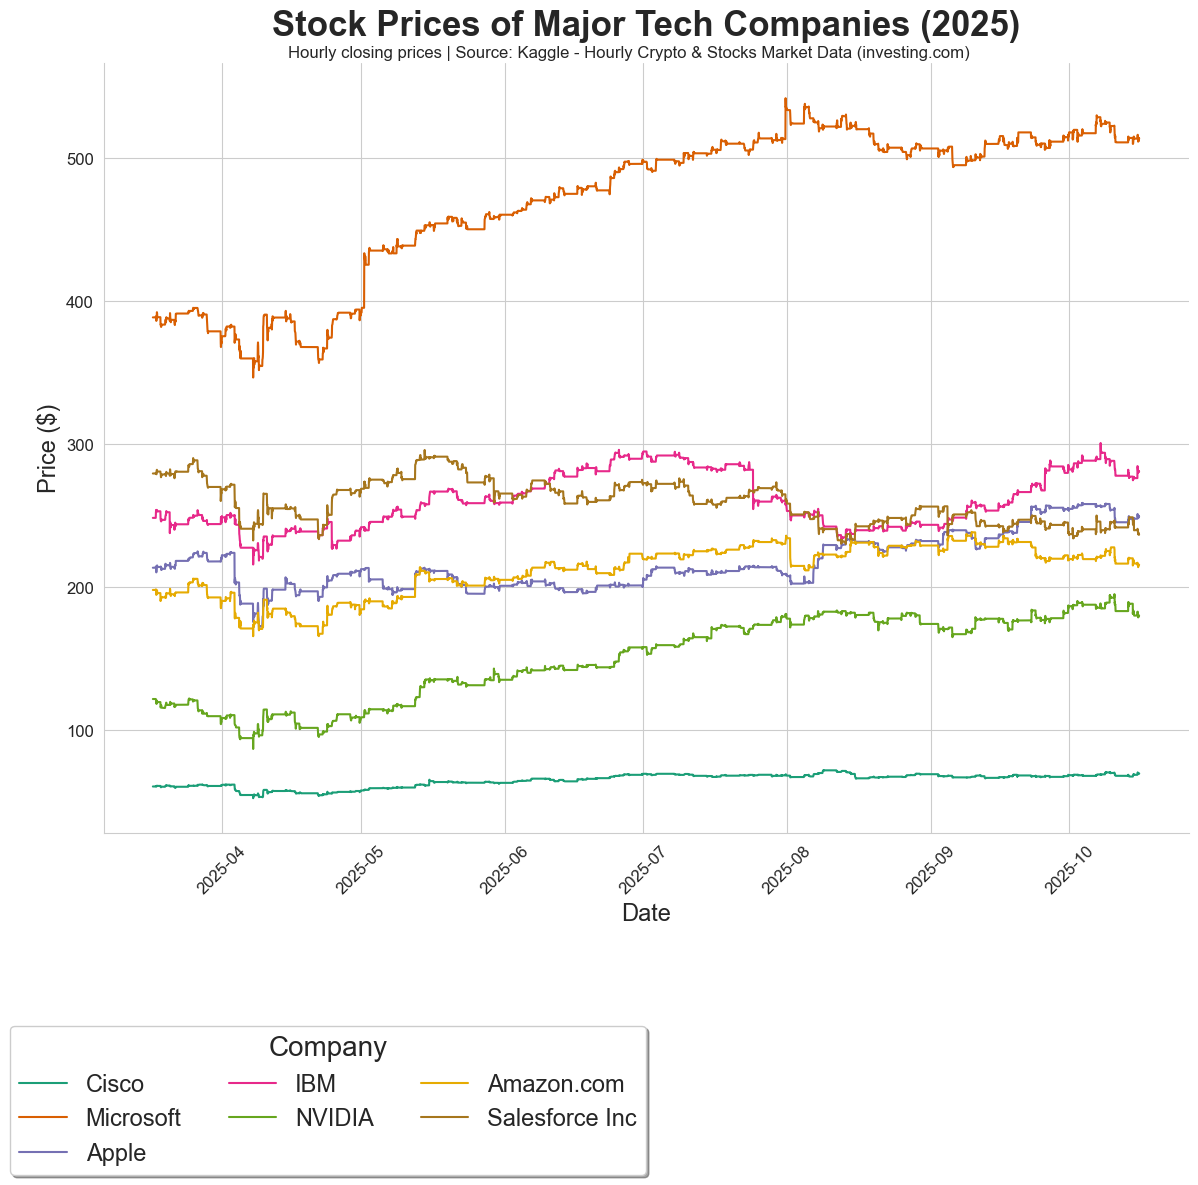

In [7]:
# Visualization #1: Major technology company stock prices over 2025

tech_comps = [
    'Microsoft',
    'Apple',
    'NVIDIA',
    'Amazon.com',
    'Cisco',
    'IBM',
    'Salesforce Inc'
]
df_tech = df[df['name'].isin(tech_comps)]

sns.set_style('whitegrid')
sns.set_palette('Dark2')
plt.figure(figsize=(14, 10))
sns.lineplot(data=df_tech, x='timestamp', y='last', hue='name')
plt.title('Stock Prices of Major Tech Companies (2025)', fontsize=25, weight='bold', pad=20)
plt.suptitle('Hourly closing prices | Source: Kaggle - Hourly Crypto & Stocks Market Data (investing.com)', fontsize=12, y=0.898)
plt.xlabel('Date', fontsize = 17)
plt.ylabel('Price ($)', fontsize = 17)
plt.xticks(rotation=45, fontsize = 12)
plt.yticks(fontsize = 12)
plt.legend(
    title = 'Company', 
    loc='best',
    bbox_to_anchor=(0.5, -.25),
    ncol = 3,
    fancybox=True,
    shadow = True,
    borderaxespad=0,
    fontsize = 17,
    title_fontsize = 20
    )
sns.despine()
plt.show()


C:\Users\eddie\AppData\Local\Temp\ipykernel_22552\1490155393.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df_growth, y='name', x ='growth', palette='Dark2')


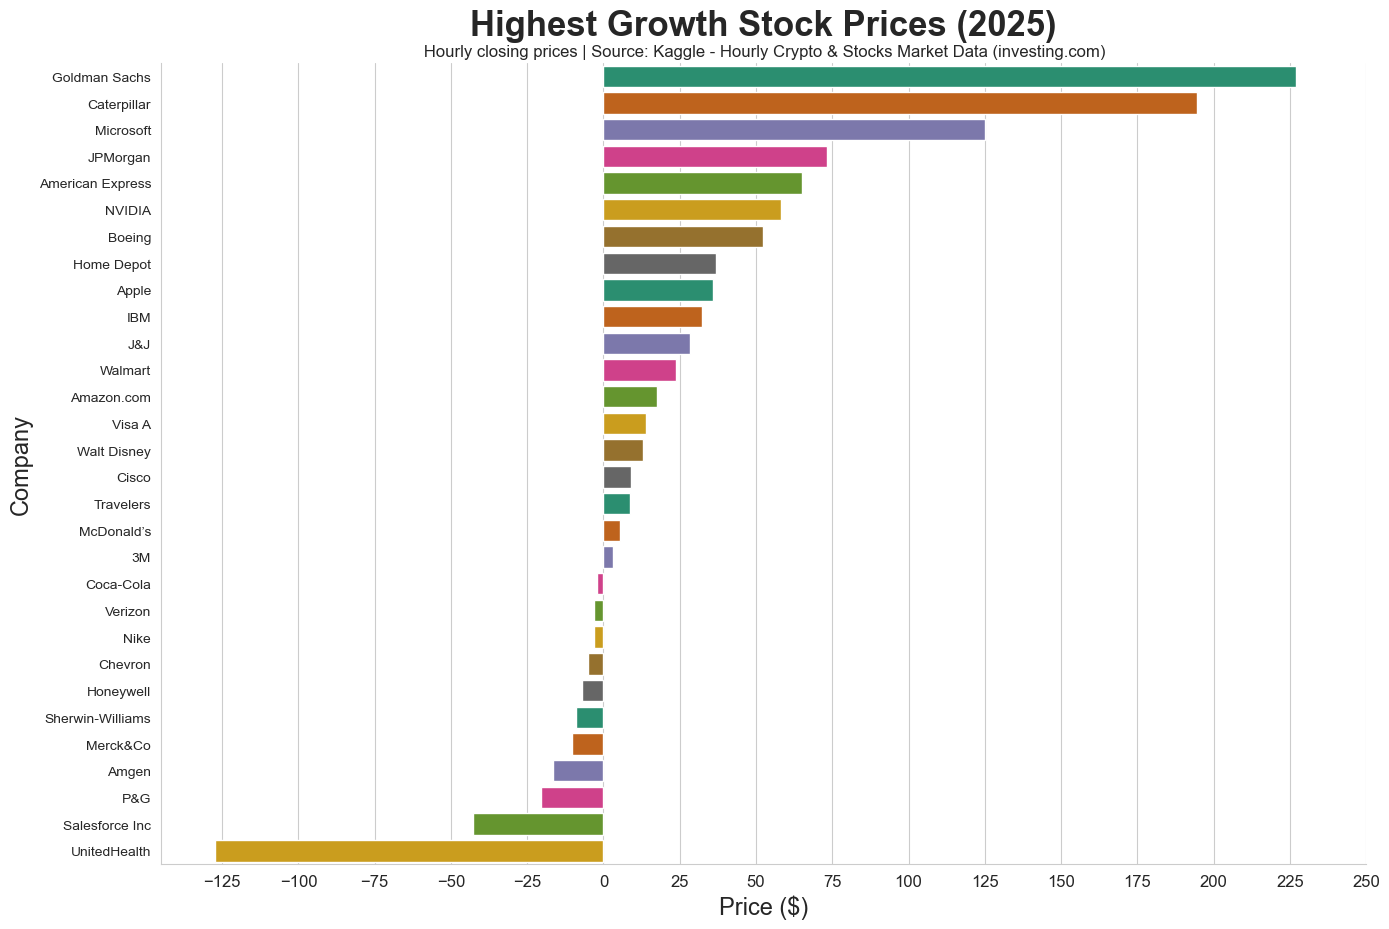

In [8]:
#  Visualization #2 - Highest growth stock prices over 2025

df_sorted = df.sort_values(by=['name', 'timestamp'])
first_close = df_sorted.groupby('name').first()
last_close = df_sorted.groupby('name').last()
changes = last_close['last'] - first_close['last']
changes = changes.sort_values(ascending=False)
df_growth = changes.reset_index()
df_growth.columns = ['name', 'growth']
df_growth

sns.set_style('whitegrid')
sns.set_palette('Dark2')
plt.figure(figsize=(14, 10))
ax = sns.barplot(data=df_growth, y='name', x ='growth', palette='Dark2')
plt.title('Highest Growth Stock Prices (2025)', fontsize=25, weight='bold', pad=20, x = 0.5)
plt.suptitle('                              Hourly closing prices | Source: Kaggle - Hourly Crypto & Stocks Market Data (investing.com)', fontsize=12, y=0.920, x = 0.5)
plt.ylabel('Company', fontsize = 17)
plt.xlabel('Price ($)', fontsize = 17)
plt.xticks(ticks = [-125, -100, -75, -50, -25, 0, 25, 50, 75, 100, 125, 150, 175, 200, 225, 250], fontsize = 12)

plt.tight_layout(rect=[0, 0.03, 1, 1])
sns.despine()
plt.show()

In [9]:
#  Visualization #3: TO BE DECIDED

Mean Squared Error: 0.388598158572386
R2 Score: 0.9856367863720737


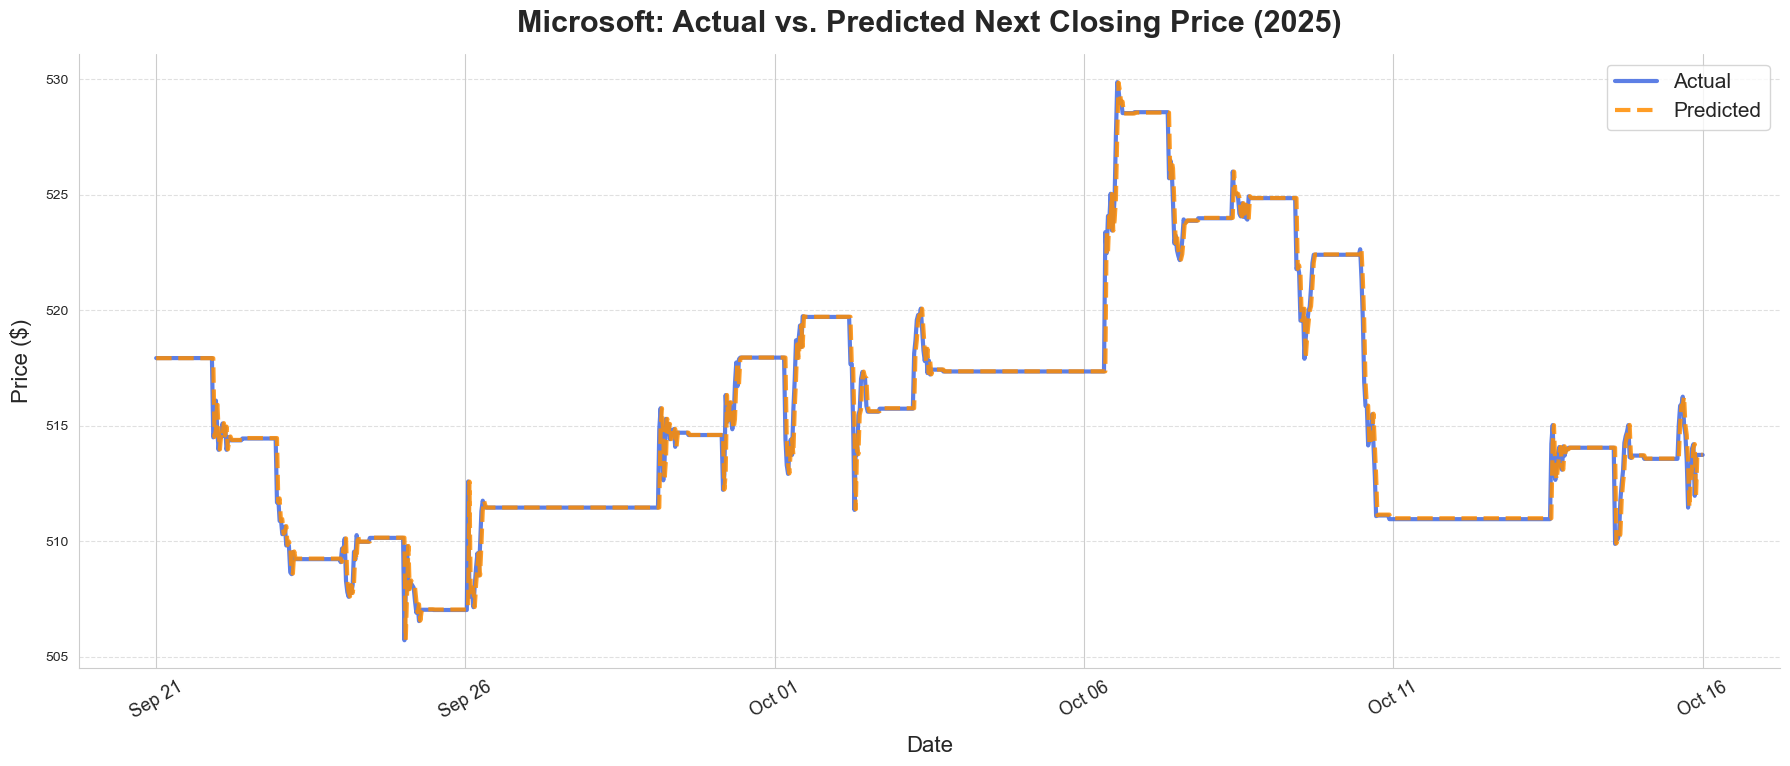

In [ ]:
#  Prediction task #1: Next closing price of Microsoft over 2025

df_microsoft = df[df['name'] == 'Microsoft']
df_microsoft = df_microsoft.sort_values(by=['timestamp'])
df_microsoft['last_lag1'] = df_microsoft['last'].shift(1)
df_microsoft['chg_lag1'] = df_microsoft['chg_'].shift(1)
df_microsoft['vol_lag1'] = df_microsoft['vol_'].shift(1)

df_microsoft = df_microsoft.dropna()
X = df_microsoft[['last_lag1', 'chg_lag1', 'vol_lag1']]
Y = df_microsoft['last']

train_size = int(len(df_microsoft) * 0.8)

X_train = X[:train_size]
Y_train = Y[:train_size]
X_test = X[train_size:]
Y_test = Y[train_size:]

model = LinearRegression()
model.fit(X_train, Y_train)

predictions = model.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score
print("Mean Squared Error:", mean_squared_error(Y_test, predictions))
print("R2 Score:", r2_score(Y_test, predictions))

test_dates = df_microsoft['timestamp'].iloc[train_size:]

sns.set_style("whitegrid")
plt.figure(figsize=(18, 8))

plt.plot(test_dates, Y_test.values, label="Actual", linewidth=3, color="royalblue", alpha=0.85)
plt.plot(test_dates, predictions, label="Predicted", linewidth=3, color="darkorange", linestyle="--", alpha=0.85)

plt.legend(fontsize=15, frameon=True)
plt.title("Microsoft: Actual vs. Predicted Next Closing Price (2025)", fontsize=22, weight='bold', pad=16)
plt.xlabel("Date", fontsize=16, labelpad=10)
plt.ylabel("Price ($)", fontsize=16, labelpad=10)

num_xticks = 6
total_test_dates = len(test_dates)
xticks_index = np.linspace(0, total_test_dates-1, num_xticks).astype(int)
xticks_dates = test_dates.iloc[xticks_index].dt.strftime('%b %d')
plt.xticks(test_dates.iloc[xticks_index], xticks_dates, rotation=30, fontsize=13)

plt.tight_layout(rect=[0, 0.03, 1, 1])
sns.despine()

plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()



